<a href="https://colab.research.google.com/github/Veny1302/Analisis-Sentimen-MBG/blob/main/SENTIMEN_ANALISIS_LSTM_MBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL DAN IMPORT

In [101]:
# Import required Python package
!pip install pandas
!pip install snscrape
!pip install transformers datasets scikit-learn torch
!pip install transformers
!pip install Sastrawi
!pip install deep_translator
!pip install imbalanced-learn

KeyboardInterrupt: 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import torch
import joblib
import re
import pandas as pd
import string
import nltk
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from transformers.modeling_utils import PreTrainedModel
from transformers import Trainer, TrainingArguments, EarlyStoppingCallback
from datasets import Dataset
from transformers import BertTokenizer, AutoModelForSequenceClassification, AutoConfig
from torch.nn import CrossEntropyLoss
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from deep_translator import GoogleTranslator

#LOAD DATASET

In [3]:
import pandas as pd

# Define the filename
filename = "mbg.csv"

# Specify the path to your CSV file
# Adjusting the path to where 'mbg.csv' is actually located.
file_path = f"/content/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1885499666772668470,Sat Feb 01 01:25:26 +0000 2025,81,UMKM industri makanan dan minuman terutama yan...,1885499666772668470,https://pbs.twimg.com/media/Giqj9AubYAQDLou.jpg,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/188549966677266...,2.654935e+08,NaN
1,1885500839802135012,Sat Feb 01 01:30:05 +0000 2025,41,Program Makan Bergizi Gratis dongkrak ekonomi ...,1885500839802135012,https://pbs.twimg.com/media/GiqlBNLbYAIVNV-.jpg,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/188550083980213...,2.986418e+08,NaN
2,1885503549729300628,Sat Feb 01 01:40:51 +0000 2025,0,PLN sebagai BUMN terus mendukung penuh program...,1885503549729300628,https://pbs.twimg.com/media/GiqnfHAbYAMNHNe.jpg,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/188550354972930...,1.769539e+18,NaN
3,1885507604560101457,Sat Feb 01 01:56:58 +0000 2025,207,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,1885507604560101457,https://pbs.twimg.com/ext_tw_video_thumb/18855...,NaN,in,NaN,8,101.0,41.0,https://x.com/undefined/status/188550760456010...,1.102462e+18,NaN
4,1885520165787623701,Sat Feb 01 02:46:53 +0000 2025,226,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,1885520165787623701,NaN,NaN,in,NaN,54,214.0,25.0,https://x.com/undefined/status/188552016578762...,1.712898e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22381,1991518585559400454,Thu Nov 20 14:46:46 +0000 2025,0,Presiden RI Prabowo Subianto meminta penggunaa...,1991518585559400454,NaN,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/199151858555940...,1.807152e+07,NaN
22382,1991542780984992005,Thu Nov 20 16:22:54 +0000 2025,0,Menteri Perdagangan (Mendag) Budi Santoso mema...,1991542780984992005,NaN,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/199154278098499...,4.232203e+08,NaN
22383,1991546899678261545,Thu Nov 20 16:39:17 +0000 2025,1,Badan Gizi Nasional (BGN) menolak desakan untu...,1991546903725764815,NaN,percivalflec,in,NaN,0,2.0,0.0,https://x.com/undefined/status/199154690372576...,1.447183e+18,NaN
22384,1991546899678261545,Thu Nov 20 16:40:37 +0000 2025,1,namun lucunya disisi lain.. Wakil Ketua Dewan ...,1991547237042933761,NaN,percivalflec,in,NaN,0,1.0,0.0,https://x.com/undefined/status/199154723704293...,1.447183e+18,NaN


In [4]:
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 22386.


In [5]:
import pandas as pd
df = pd.read_csv("/content/mbg.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1885499666772668470,Sat Feb 01 01:25:26 +0000 2025,81,UMKM industri makanan dan minuman terutama yan...,1885499666772668470,https://pbs.twimg.com/media/Giqj9AubYAQDLou.jpg,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/188549966677266...,2.654935e+08,NaN
1,1885500839802135012,Sat Feb 01 01:30:05 +0000 2025,41,Program Makan Bergizi Gratis dongkrak ekonomi ...,1885500839802135012,https://pbs.twimg.com/media/GiqlBNLbYAIVNV-.jpg,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/188550083980213...,2.986418e+08,NaN
2,1885503549729300628,Sat Feb 01 01:40:51 +0000 2025,0,PLN sebagai BUMN terus mendukung penuh program...,1885503549729300628,https://pbs.twimg.com/media/GiqnfHAbYAMNHNe.jpg,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/188550354972930...,1.769539e+18,NaN
3,1885507604560101457,Sat Feb 01 01:56:58 +0000 2025,207,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,1885507604560101457,https://pbs.twimg.com/ext_tw_video_thumb/18855...,NaN,in,NaN,8,101.0,41.0,https://x.com/undefined/status/188550760456010...,1.102462e+18,NaN
4,1885520165787623701,Sat Feb 01 02:46:53 +0000 2025,226,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,1885520165787623701,NaN,NaN,in,NaN,54,214.0,25.0,https://x.com/undefined/status/188552016578762...,1.712898e+07,NaN


#EDA

In [6]:
# Cek jumlah data dan kolom yang ada
df.shape

(22386, 15)

In [100]:
# Cek jumlah data yang didapatkan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22332 entries, 0 to 22334
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             22332 non-null  object
 1   cleaning          22332 non-null  object
 2   case_folding      22332 non-null  object
 3   normalisasi       22332 non-null  object
 4   tokenize          22332 non-null  object
 5   stopword removal  22332 non-null  object
 6   steming_data      22332 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [8]:
# Cek missing value
print(df.isnull().sum())

conversation_id_str            0
created_at                     0
favorite_count                 0
full_text                      1
id_str                         1
image_url                   5855
in_reply_to_screen_name    18363
lang                           1
location                   22385
quote_count                    1
reply_count                    1
retweet_count                  2
tweet_url                      2
user_id_str                    2
username                   22386
dtype: int64


In [9]:
# Cek duplicate values kolom uniqueId dan text
print(df.duplicated(subset='id_str').sum())
print(df.duplicated(subset='full_text').sum())

4
51


In [10]:
import re
# Cek karakter unik pada kolom teks
def detect_URL(text):
    return bool(re.search(r'https?://\S+|www\.\S+', str(text)))

def detect_html(text):
    return bool(re.search(r'<.*?>', str(text)))

def detect_emoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U0001F004-\U0001F0CF"
        u"\U0001F1E0-\U0001F1FF"
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(str(text)))

def detect_symbol(text):
    return bool(re.search(r'[^a-zA-Z0-9\s]', str(text)))

def detect_number(text):
    return bool(re.search(r'\d', str(text)))

df['has_url'] = df['full_text'].apply(detect_URL)
df['has_html'] = df['full_text'].apply(detect_html)
df['has_emoji'] = df['full_text'].apply(detect_emoji)
df['has_symbol'] = df['full_text'].apply(detect_symbol)
df['has_number'] = df['full_text'].apply(detect_number)

In [11]:
print(df[['has_url', 'has_html', 'has_emoji', 'has_symbol', 'has_number']].sum())

has_url       19054
has_html          0
has_emoji       429
has_symbol    22165
has_number    17977
dtype: int64


In [99]:
plt.style.use('default')
sns.set_palette("husl")

# Create figure dengan ukuran yang sesuai
plt.figure(figsize=(10, 6))

# Plot histogram dengan KDE
sns.histplot(data=df, x="favorite_count", bins=30, kde=True, color="skyblue", alpha=0.7)

# Customize plot
plt.title("Distribusi Jumlah Like per Komentar", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Jumlah Like", fontsize=12)
plt.ylabel("Jumlah Komentar", fontsize=12)

# Atur ticks pada sumbu x dan y sesuai dengan deskripsi
plt.xticks([0, 10000, 20000, 30000])
plt.yticks([0, 10000, 20000, 30000])

# Grid untuk memudahkan membaca nilai
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Tampilkan plot
plt.show()

ValueError: Could not interpret value `favorite_count` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'reply_count' is already numeric (float64), so no conversion needed, but handle potential NaNs
df_filtered_replies = df.dropna(subset=['reply_count'])

# Determine a reasonable upper limit for the x-axis to focus on the majority of data
max_replies_display = df_filtered_replies['reply_count'].quantile(0.99) # Get 99th percentile
df_plotting_replies = df_filtered_replies[df_filtered_replies['reply_count'] <= max_replies_display]

plt.figure(figsize=(10, 6))
sns.histplot(df_plotting_replies["reply_count"], bins=50, kde=True, color="green")
plt.title("Distribusi Jumlah Balasan per Komentar (Fokus pada Data Utama)", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Jumlah Balasan", fontsize=12)
plt.ylabel("Jumlah Komentar", fontsize=12)

# Adjust ticks dynamically based on the max_replies_display
plt.xticks(rotation=45)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

KeyError: ['reply_count']

In [14]:
df = pd.DataFrame(df[['full_text']])
df.head()

,full_text
0,UMKM industri makanan dan minuman terutama yan...
1,Program Makan Bergizi Gratis dongkrak ekonomi ...
2,PLN sebagai BUMN terus mendukung penuh program...
3,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...
4,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...


###HAPUS DATA DUPLIKAT

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22386 entries, 0 to 22385
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  22385 non-null  object
dtypes: object(1)
memory usage: 175.0+ KB


In [16]:
df.drop_duplicates(subset=['full_text'], inplace=True)
print("Jumlah data setelah duplikasi dihapus:", df.shape[0])

Jumlah data setelah duplikasi dihapus: 22335


###WORDCLOUD SEBELUM PREPROCESSING




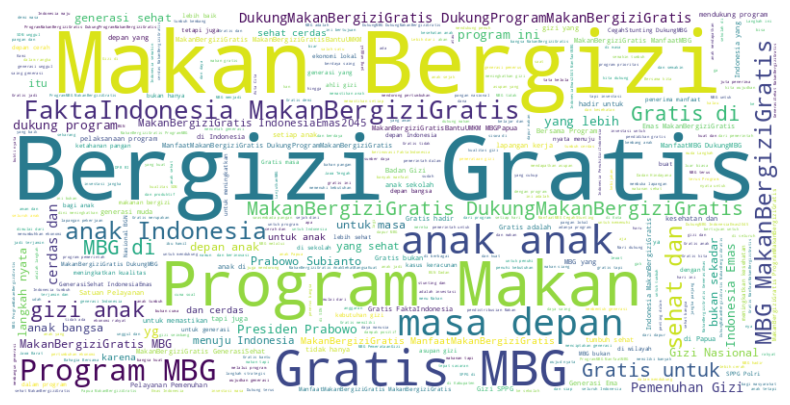

In [17]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df['full_text']= df['full_text'].fillna('')

text = ''.join(df['full_text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', 't', 'x'])

wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=800,
    height=400
)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

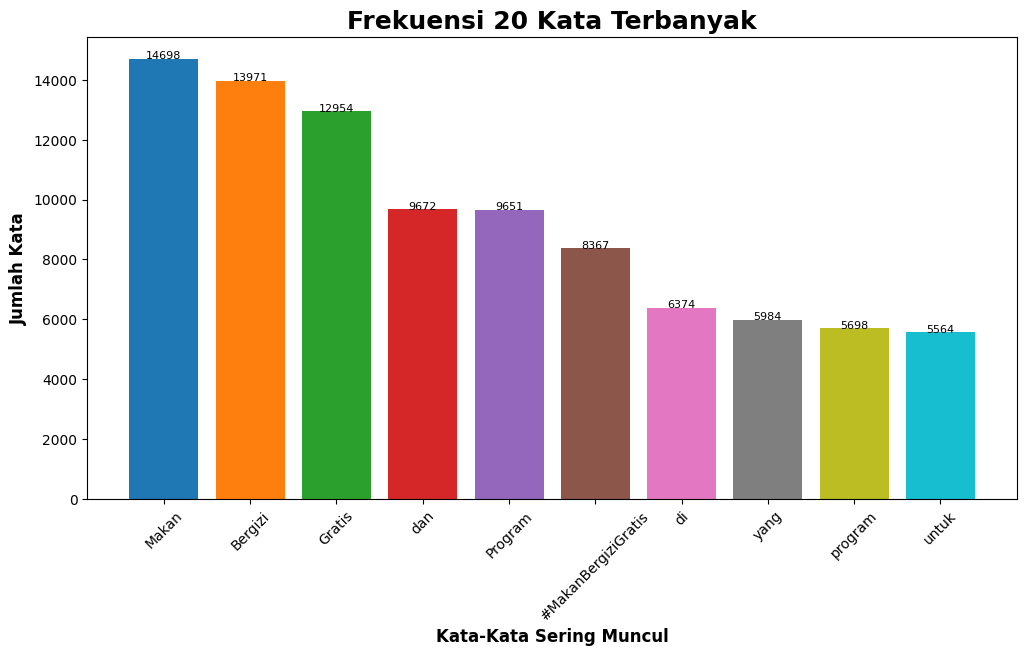

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["full_text"])

tokens = text.split()
word_counts = Counter(tokens)

# Ambil 20 kata paling sering muncul
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)

plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi 20 Kata Terbanyak", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Tambahkan angka di atas bar
for bar, num in zip(bars, count):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        num + 1,
        str(num),
        fontsize=8,
        color='black',
        ha='center'
    )

plt.show()


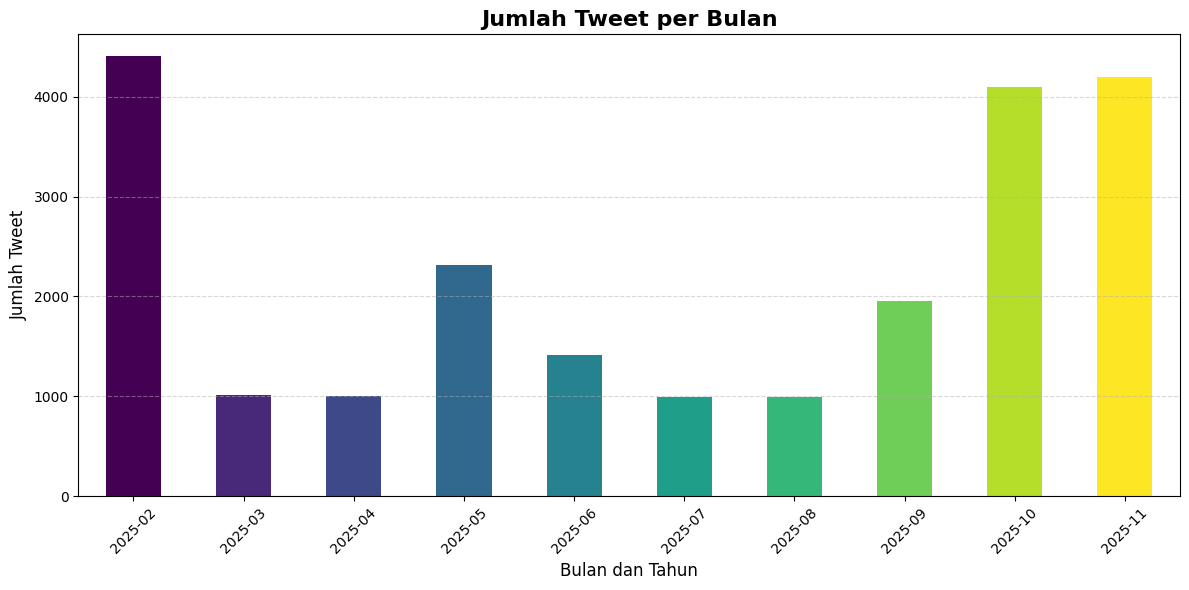

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Re-load df and process it to ensure 'date' column is present
df = pd.read_csv("/content/mbg.csv")
df = df[['created_at', 'full_text', 'username']].rename(columns={'created_at': 'date', 'full_text': 'tweet'}).drop_duplicates()

tweets = df.copy()

tweets['date'] = pd.to_datetime(
    tweets['date'],
    format='%a %b %d %H:%M:%S +0000 %Y',
    errors='coerce' # Handle parsing errors by coercing invalid dates to NaT
)

# Drop rows where 'date' could not be parsed (i.e., are NaT)
tweets.dropna(subset=['date'], inplace=True)

tweets['YearMonth'] = tweets['date'].dt.to_period('M')

monthly_tweets = tweets.groupby('YearMonth').size()

colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_tweets)))

# Plot grafik
plt.figure(figsize=(12, 6))
monthly_tweets.plot(kind='bar', color=colors)

plt.xlabel("Bulan dan Tahun", fontsize=12)
plt.ylabel("Jumlah Tweet", fontsize=12)
plt.title("Jumlah Tweet per Bulan", fontsize=16, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [20]:
import csv
def export_to_csv(df, file_name='tweets-mbg'):
    if not df.empty:
        # Update fieldnames to match the current columns in df
        fieldnames = ['date', 'tweet']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for index, row in df.iterrows():
                writer.writerow({
                    'date': row['date'],
                    'tweet': row['tweet'],
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(df)

Data berhasil diekspor ke 'tweets-mbg'


In [21]:
data = pd.read_csv("/content/mbg.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22386 entries, 0 to 22385
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      22386 non-null  object 
 1   created_at               22386 non-null  object 
 2   favorite_count           22386 non-null  object 
 3   full_text                22385 non-null  object 
 4   id_str                   22385 non-null  object 
 5   image_url                16531 non-null  object 
 6   in_reply_to_screen_name  4023 non-null   object 
 7   lang                     22385 non-null  object 
 8   location                 1 non-null      float64
 9   quote_count              22385 non-null  object 
 10  reply_count              22385 non-null  float64
 11  retweet_count            22384 non-null  float64
 12  tweet_url                22384 non-null  object 
 13  user_id_str              22384 non-null  float64
 14  username              

In [22]:
data.head(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1885499666772668470,Sat Feb 01 01:25:26 +0000 2025,81,UMKM industri makanan dan minuman terutama yan...,1885499666772668470,https://pbs.twimg.com/media/Giqj9AubYAQDLou.jpg,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/188549966677266...,2.654935e+08,NaN
1,1885500839802135012,Sat Feb 01 01:30:05 +0000 2025,41,Program Makan Bergizi Gratis dongkrak ekonomi ...,1885500839802135012,https://pbs.twimg.com/media/GiqlBNLbYAIVNV-.jpg,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/188550083980213...,2.986418e+08,NaN
2,1885503549729300628,Sat Feb 01 01:40:51 +0000 2025,0,PLN sebagai BUMN terus mendukung penuh program...,1885503549729300628,https://pbs.twimg.com/media/GiqnfHAbYAMNHNe.jpg,NaN,in,NaN,0,0.0,0.0,https://x.com/undefined/status/188550354972930...,1.769539e+18,NaN
3,1885507604560101457,Sat Feb 01 01:56:58 +0000 2025,207,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,1885507604560101457,https://pbs.twimg.com/ext_tw_video_thumb/18855...,NaN,in,NaN,8,101.0,41.0,https://x.com/undefined/status/188550760456010...,1.102462e+18,NaN
4,1885520165787623701,Sat Feb 01 02:46:53 +0000 2025,226,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,1885520165787623701,NaN,NaN,in,NaN,54,214.0,25.0,https://x.com/undefined/status/188552016578762...,1.712898e+07,NaN


#PREPROCESSING DATA

In [23]:
data = pd.read_csv("/content/tweets-mbg")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22386 entries, 0 to 22385
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    22386 non-null  object
 1   tweet   22385 non-null  object
dtypes: object(2)
memory usage: 349.9+ KB


In [24]:
data.head(10)

,date,tweet
0,Sat Feb 01 01:25:26 +0000 2025,UMKM industri makanan dan minuman terutama yan...
1,Sat Feb 01 01:30:05 +0000 2025,Program Makan Bergizi Gratis dongkrak ekonomi ...
2,Sat Feb 01 01:40:51 +0000 2025,PLN sebagai BUMN terus mendukung penuh program...
3,Sat Feb 01 01:56:58 +0000 2025,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...
4,Sat Feb 01 02:46:53 +0000 2025,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...
5,Sat Feb 01 11:22:14 +0000 2025,EKONOMI KITA MAJU KARENA PROGRAM MAKAN BERGIZI...
6,Sun Feb 02 06:44:29 +0000 2025,Korupai Makan Bergizi Gratis Yang dikuatirkan ...
7,Mon Feb 03 00:50:07 +0000 2025,@kumparan Program MBG itu potensi bocor besar....
8,Mon Feb 03 03:55:59 +0000 2025,Pada hari senin 3 November 2025 Ratusan Siswa ...
9,Mon Feb 03 06:12:39 +0000 2025,Pak @prabowo buat apa makan bergizi gratis di ...


In [25]:
df  = pd.DataFrame(data[['date','tweet']])
df.head(5)

,date,tweet
0,Sat Feb 01 01:25:26 +0000 2025,UMKM industri makanan dan minuman terutama yan...
1,Sat Feb 01 01:30:05 +0000 2025,Program Makan Bergizi Gratis dongkrak ekonomi ...
2,Sat Feb 01 01:40:51 +0000 2025,PLN sebagai BUMN terus mendukung penuh program...
3,Sat Feb 01 01:56:58 +0000 2025,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...
4,Sat Feb 01 02:46:53 +0000 2025,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...


##Hapus Duplikat Values

In [26]:
df.drop_duplicates(subset ="tweet", keep = 'first', inplace = True)

In [27]:
df.shape

(22335, 2)

##Cleaning

In [28]:
import pandas as pd
import re

# Ensure 'tweet' and 'cleaning' columns exist in df
# If 'full_text' is present and 'tweet' is not, rename 'full_text' to 'tweet'
if 'full_text' in df.columns and 'tweet' not in df.columns:
    df = df.rename(columns={'full_text': 'tweet'})

# If 'tweet' is present and 'cleaning' is not, create the 'cleaning' column
if 'tweet' in df.columns and 'cleaning' not in df.columns:
    df['cleaning'] = df['tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|@\w+|#\w+|\d+|[.,!?:;"\'\`\]\[()]', '', str(x) if pd.notna(x) else ''))

df_cleaned_text = df[['tweet', 'cleaning']]
display(df_cleaned_text.head(10))

,tweet,cleaning
0,UMKM industri makanan dan minuman terutama yan...,UMKM industri makanan dan minuman terutama yan...
1,Program Makan Bergizi Gratis dongkrak ekonomi ...,Program Makan Bergizi Gratis dongkrak ekonomi ...
2,PLN sebagai BUMN terus mendukung penuh program...,PLN sebagai BUMN terus mendukung penuh program...
3,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...
4,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,Hashim Pede Ekonomi Tumbuh Persen Berkat Maka...
5,EKONOMI KITA MAJU KARENA PROGRAM MAKAN BERGIZI...,EKONOMI KITA MAJU KARENA PROGRAM MAKAN BERGIZI...
6,Korupai Makan Bergizi Gratis Yang dikuatirkan ...,Korupai Makan Bergizi Gratis Yang dikuatirkan ...
7,@kumparan Program MBG itu potensi bocor besar....,Program MBG itu potensi bocor besar Lbh baik ...
8,Pada hari senin 3 November 2025 Ratusan Siswa ...,Pada hari senin November Ratusan Siswa yang ...
9,Pak @prabowo buat apa makan bergizi gratis di ...,Pak buat apa makan bergizi gratis di sekolah ...


##Casefolding

In [29]:
df['case_folding'] = df['cleaning'].str.lower()
display(df[['tweet', 'cleaning', 'case_folding']].head())

,tweet,cleaning,case_folding
0,UMKM industri makanan dan minuman terutama yan...,UMKM industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...
1,Program Makan Bergizi Gratis dongkrak ekonomi ...,Program Makan Bergizi Gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...
2,PLN sebagai BUMN terus mendukung penuh program...,PLN sebagai BUMN terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...
3,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,opsi lain untuk lauk makan bergizi gratis ulat...
4,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,Hashim Pede Ekonomi Tumbuh Persen Berkat Maka...,hashim pede ekonomi tumbuh persen berkat maka...


##Normalisasi Kata

In [51]:
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append('<karakter eksplisit>')
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [55]:
data =  pd.DataFrame(df[['tweet','cleaning','case_folding',]])
data.head(5)

,tweet,cleaning,case_folding
0,UMKM industri makanan dan minuman terutama yan...,UMKM industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...
1,Program Makan Bergizi Gratis dongkrak ekonomi ...,Program Makan Bergizi Gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...
2,PLN sebagai BUMN terus mendukung penuh program...,PLN sebagai BUMN terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...
3,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,opsi lain untuk lauk makan bergizi gratis ulat...
4,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,Hashim Pede Ekonomi Tumbuh Persen Berkat Maka...,hashim pede ekonomi tumbuh persen berkat maka...


In [57]:
kamus_data = pd.read_excel("/content/kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak baku'], kamus_data['baku']))

In [59]:
data['normalisasi'], data['Baku'], data['tidak baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df =  pd.DataFrame(data[['tweet','cleaning','case_folding','normalisasi']])

##Tokenize

In [60]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)


,tweet,cleaning,case_folding,normalisasi,tokenize
0,UMKM industri makanan dan minuman terutama yan...,UMKM industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...,"[umkm, industri, makanan, dan, minuman, teruta..."
1,Program Makan Bergizi Gratis dongkrak ekonomi ...,Program Makan Bergizi Gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...,"[program, makan, bergizi, gratis, dongkrak, ek..."
2,PLN sebagai BUMN terus mendukung penuh program...,PLN sebagai BUMN terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...,"[pln, sebagai, bumn, terus, mendukung, penuh, ..."
3,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,opsi lain untuk lauk makan bergizi gratis ulat...,opsi lain untuk lauk makan bergizi gratis ulat...,"[opsi, lain, untuk, lauk, makan, bergizi, grat..."
4,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,Hashim Pede Ekonomi Tumbuh Persen Berkat Maka...,hashim pede ekonomi tumbuh persen berkat maka...,hashim pede ekonomi tumbuh persen berkat makan...,"[hashim, pede, ekonomi, tumbuh, persen, berkat..."


##Stopword Removal

In [33]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [61]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,tweet,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,UMKM industri makanan dan minuman terutama yan...,UMKM industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...,"[umkm, industri, makanan, dan, minuman, teruta...","[umkm, industri, makanan, minuman, usahanya, l..."
1,Program Makan Bergizi Gratis dongkrak ekonomi ...,Program Makan Bergizi Gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...,"[program, makan, bergizi, gratis, dongkrak, ek...","[program, makan, bergizi, gratis, dongkrak, ek..."
2,PLN sebagai BUMN terus mendukung penuh program...,PLN sebagai BUMN terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...,"[pln, sebagai, bumn, terus, mendukung, penuh, ...","[pln, bumn, mendukung, penuh, program, makan, ..."
3,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,opsi lain untuk lauk makan bergizi gratis ulat...,opsi lain untuk lauk makan bergizi gratis ulat...,"[opsi, lain, untuk, lauk, makan, bergizi, grat...","[opsi, lauk, makan, bergizi, gratis, ulat, hon..."
4,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,Hashim Pede Ekonomi Tumbuh Persen Berkat Maka...,hashim pede ekonomi tumbuh persen berkat maka...,hashim pede ekonomi tumbuh persen berkat makan...,"[hashim, pede, ekonomi, tumbuh, persen, berkat...","[hashim, pede, ekonomi, tumbuh, persen, berkat..."


##Stemming Data

In [62]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,tweet,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,UMKM industri makanan dan minuman terutama yan...,UMKM industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...,"[umkm, industri, makanan, dan, minuman, teruta...","[umkm, industri, makanan, minuman, usahanya, l...",umkm industri makan minum usaha lokasi sekolah...
1,Program Makan Bergizi Gratis dongkrak ekonomi ...,Program Makan Bergizi Gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...,"[program, makan, bergizi, gratis, dongkrak, ek...","[program, makan, bergizi, gratis, dongkrak, ek...",program makan gizi gratis dongkrak ekonomi lok...
2,PLN sebagai BUMN terus mendukung penuh program...,PLN sebagai BUMN terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...,"[pln, sebagai, bumn, terus, mendukung, penuh, ...","[pln, bumn, mendukung, penuh, program, makan, ...",pln bumn dukung penuh program makan gizi grati...
3,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,opsi lain untuk lauk makan bergizi gratis ulat...,opsi lain untuk lauk makan bergizi gratis ulat...,"[opsi, lain, untuk, lauk, makan, bergizi, grat...","[opsi, lauk, makan, bergizi, gratis, ulat, hon...",opsi lauk makan gizi gratis ulat hongkong maka...
4,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,Hashim Pede Ekonomi Tumbuh Persen Berkat Maka...,hashim pede ekonomi tumbuh persen berkat maka...,hashim pede ekonomi tumbuh persen berkat makan...,"[hashim, pede, ekonomi, tumbuh, persen, berkat...","[hashim, pede, ekonomi, tumbuh, persen, berkat...",hashim pede ekonomi tumbuh persen berkat makan...



##Proses Hapus Data Bernilai Kosong (NAN)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22335 entries, 0 to 22385
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             22334 non-null  object
 1   cleaning          22335 non-null  object
 2   case_folding      22335 non-null  object
 3   normalisasi       22335 non-null  object
 4   tokenize          22335 non-null  object
 5   stopword removal  22335 non-null  object
 6   steming_data      22335 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [64]:
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22334 entries, 0 to 22385
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             22334 non-null  object
 1   cleaning          22334 non-null  object
 2   case_folding      22334 non-null  object
 3   normalisasi       22334 non-null  object
 4   tokenize          22334 non-null  object
 5   stopword removal  22334 non-null  object
 6   steming_data      22334 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


#WORDCLOUD SETELAH PREPROCESSING

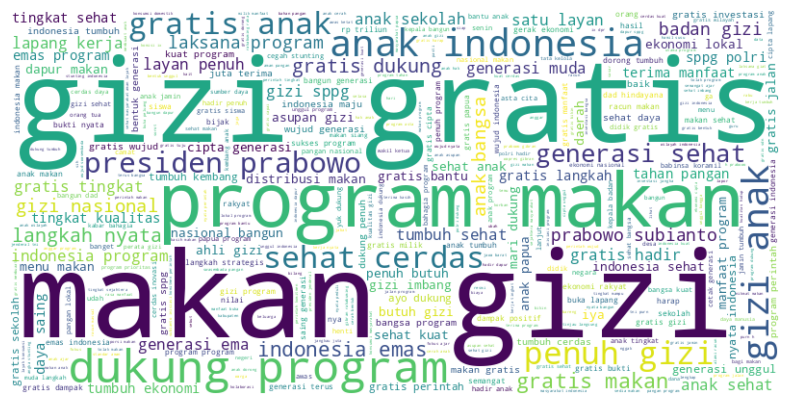

In [66]:
# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','ya'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

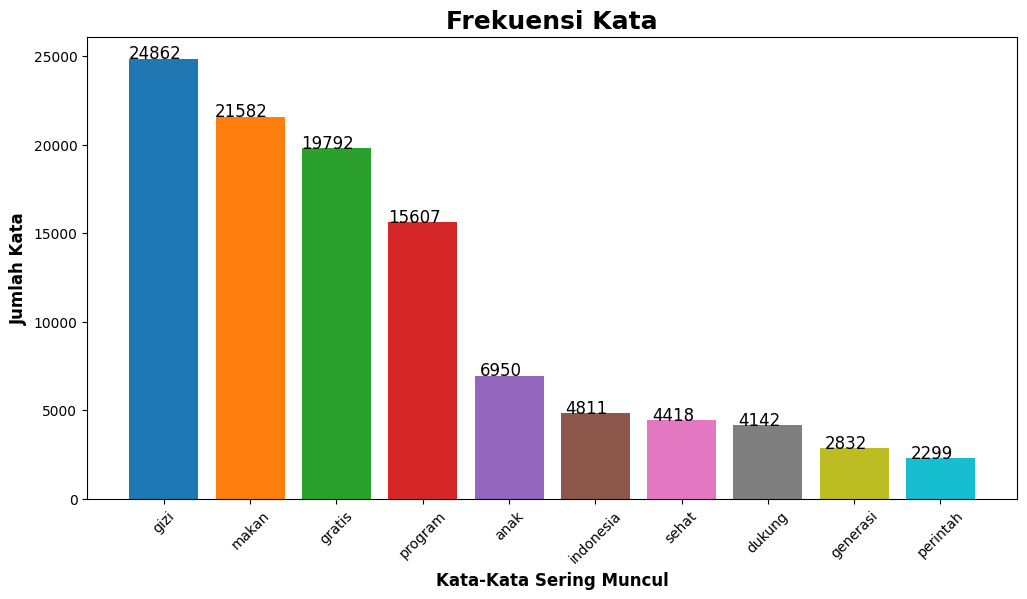

In [67]:
tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

In [68]:
df.to_csv('hasil_prepocessing.csv',encoding='utf8', index=False);

#LABELLING DATA DENGAN LEXICON BASED

In [69]:
data = pd.read_csv("/content/hasil_prepocessing.csv")
data.head(5)

,tweet,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,UMKM industri makanan dan minuman terutama yan...,UMKM industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...,umkm industri makanan dan minuman terutama yan...,"['umkm', 'industri', 'makanan', 'dan', 'minuma...","['umkm', 'industri', 'makanan', 'minuman', 'us...",umkm industri makan minum usaha lokasi sekolah...
1,Program Makan Bergizi Gratis dongkrak ekonomi ...,Program Makan Bergizi Gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...,program makan bergizi gratis dongkrak ekonomi ...,"['program', 'makan', 'bergizi', 'gratis', 'don...","['program', 'makan', 'bergizi', 'gratis', 'don...",program makan gizi gratis dongkrak ekonomi lok...
2,PLN sebagai BUMN terus mendukung penuh program...,PLN sebagai BUMN terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...,pln sebagai bumn terus mendukung penuh program...,"['pln', 'sebagai', 'bumn', 'terus', 'mendukung...","['pln', 'bumn', 'mendukung', 'penuh', 'program...",pln bumn dukung penuh program makan gizi grati...
3,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,Opsi lain untuk lauk Makan Bergizi Gratis Ulat...,opsi lain untuk lauk makan bergizi gratis ulat...,opsi lain untuk lauk makan bergizi gratis ulat...,"['opsi', 'lain', 'untuk', 'lauk', 'makan', 'be...","['opsi', 'lauk', 'makan', 'bergizi', 'gratis',...",opsi lauk makan gizi gratis ulat hongkong maka...
4,Hashim Pede Ekonomi Tumbuh 9 Persen Berkat Mak...,Hashim Pede Ekonomi Tumbuh Persen Berkat Maka...,hashim pede ekonomi tumbuh persen berkat maka...,hashim pede ekonomi tumbuh persen berkat makan...,"['hashim', 'pede', 'ekonomi', 'tumbuh', 'perse...","['hashim', 'pede', 'ekonomi', 'tumbuh', 'perse...",hashim pede ekonomi tumbuh persen berkat makan...


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22335 entries, 0 to 22334
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             22334 non-null  object
 1   cleaning          22334 non-null  object
 2   case_folding      22334 non-null  object
 3   normalisasi       22334 non-null  object
 4   tokenize          22335 non-null  object
 5   stopword removal  22335 non-null  object
 6   steming_data      22332 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [71]:
df = data.dropna()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22332 entries, 0 to 22334
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet             22332 non-null  object
 1   cleaning          22332 non-null  object
 2   case_folding      22332 non-null  object
 3   normalisasi       22332 non-null  object
 4   tokenize          22332 non-null  object
 5   stopword removal  22332 non-null  object
 6   steming_data      22332 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [81]:
data = pd.DataFrame(data[['steming_data']])
data.head()

,steming_data
0,umkm industri makan minum usaha lokasi sekolah...
1,program makan gizi gratis dongkrak ekonomi lok...
2,pln bumn dukung penuh program makan gizi grati...
3,opsi lauk makan gizi gratis ulat hongkong maka...
4,hashim pede ekonomi tumbuh persen berkat makan...


In [83]:
import pandas as pd
import requests

# ===============================
# 1. Unduh kamus positif & negatif InSet dari GitHub
# ===============================
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# ===============================
# 2. Fungsi untuk menentukan sentimen dan menghitung skor
# ===============================
def determine_sentiment(text):
    if isinstance(text, str):

        # Hitung jumlah kata positif & negatif
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)

        # Skor sentimen
        sentiment_score = positive_count - negative_count

        # Tentukan label sentimen
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"

        return sentiment_score, sentiment

    return 0, "Netral"

# Apply the function to the 'stemming_data' column
data[['sentiment_score', 'sentiment_label']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))
display(data.head())

,steming_data,sentiment_score,sentiment_label
0,umkm industri makan minum usaha lokasi sekolah...,2,Positif
1,program makan gizi gratis dongkrak ekonomi lok...,1,Positif
2,pln bumn dukung penuh program makan gizi grati...,1,Positif
3,opsi lauk makan gizi gratis ulat hongkong maka...,2,Positif
4,hashim pede ekonomi tumbuh persen berkat makan...,3,Positif


In [84]:
# Check the distribution of sentiment labels for the entire DataFrame
sentiment_distribution = df_sentiment_results['sentiment_label'].value_counts()
display(sentiment_distribution)

,count
sentiment_label,
Positif,15036
Netral,3968
Negatif,3331


/tmp/ipython-input-3972476278.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


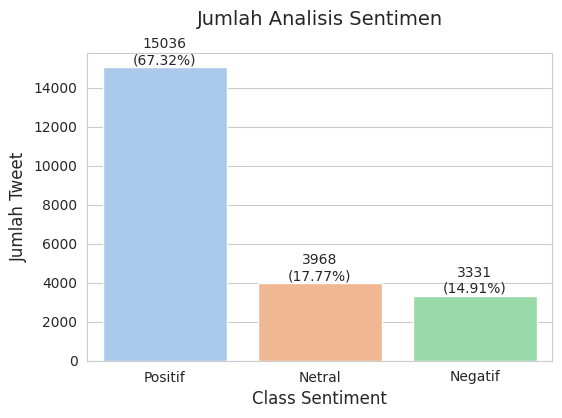

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment_label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')

plt.title("Jumlah Analisis Sentimen", fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(data['sentiment_label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{(100 * count / total):.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(
    data=df_label,
    x="Sentiment",
    hue="Sentiment",
    palette="pastel"
)
plt.title("Distribusi Kelas Sentimen")
plt.ylabel("Jumlah")
plt.xlabel("Sentimen")
plt.show()


ValueError: Could not interpret value `Sentiment` for `x`. An entry with this name does not appear in `data`.

<Figure size 500x400 with 0 Axes>